# Walking and Running Classification

## Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix


## Data

In [7]:
data=pd.read_csv('walkrun.csv')

In [8]:
data

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...,...,...,...,...,...
88583,2017-7-9,20:9:15:317911028,viktor,0,0,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,2017-7-9,20:9:15:517889022,viktor,0,0,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,2017-7-9,20:9:15:717828989,viktor,0,0,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,2017-7-9,20:9:15:917932987,viktor,0,0,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


## Checks on Data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [10]:
data.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [11]:
data.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [12]:
data.wrist.value_counts()

1    46258
0    42330
Name: wrist, dtype: int64

In [14]:
data.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


### - Balnaced (can be considered) dataset
### - No NaN value 


## Visualisation

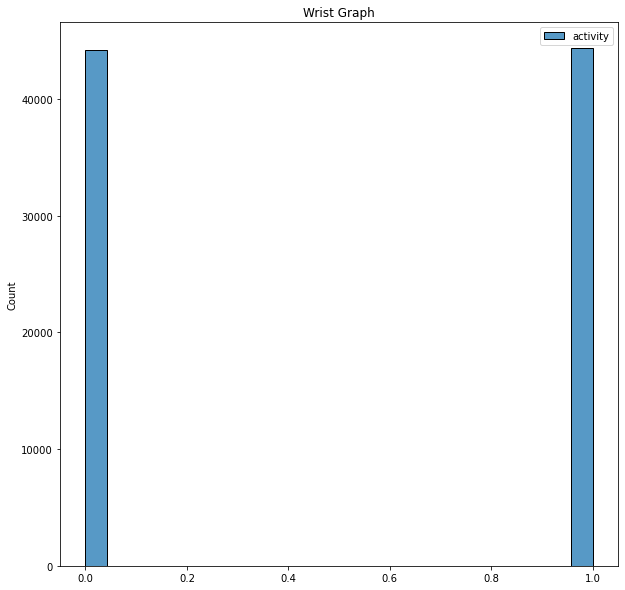

In [13]:

plt.figure(figsize=(10,10))
sns.histplot(data[['activity']])
plt.title('Activity Graph')
plt.show()

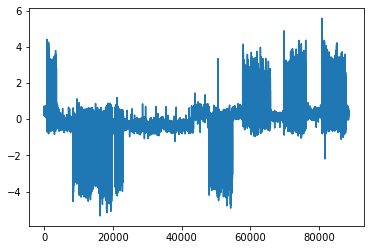

In [15]:
plt.plot(data[['acceleration_x']])

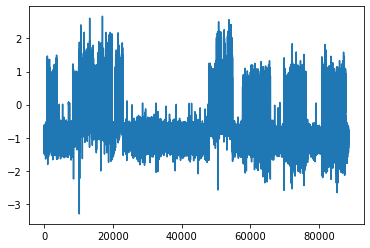

In [16]:
plt.plot(data[['acceleration_y']])

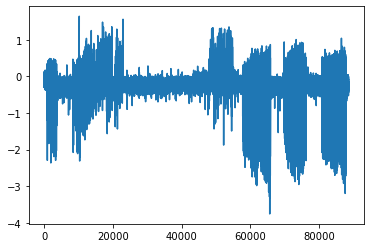

In [17]:
plt.plot(data[['acceleration_z']])

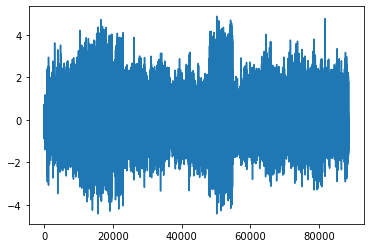

In [18]:
plt.plot(data[['gyro_x']])

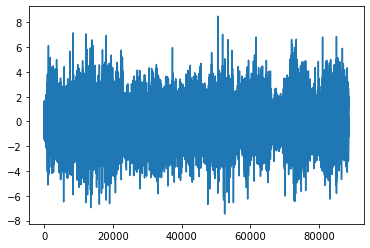

In [19]:
plt.plot(data[['gyro_y']])

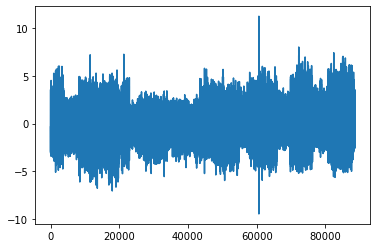

In [20]:
plt.plot(data[['gyro_z']])

In [22]:
# selecting dependent and indpendent variables
x= data[['acceleration_x','acceleration_y','acceleration_z','gyro_x','gyro_y','gyro_z']]
y=data[['activity']]

In [24]:
x

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922
...,...,...,...,...,...,...
88583,0.3084,-0.8376,-0.1327,0.4823,2.0124,0.6048
88584,0.4977,-1.0027,-0.4397,0.1022,-1.2565,-0.0761
88585,0.4587,-1.1780,-0.2827,-1.4500,-0.2792,-1.2616
88586,0.2590,-0.8582,-0.0759,-1.5165,0.4560,-1.7755


In [25]:
y

,activity
0,0
1,0
2,0
3,0
4,0
...,...
88583,0
88584,0
88585,0
88586,0


In [26]:
# Splitting datset into testing and training part
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y)

In [28]:
# Creating models
model1=LogisticRegression()
model2=KNeighborsClassifier()
model3=DecisionTreeClassifier()
model4=RandomForestClassifier()
model5=GradientBoostingClassifier()
model6=SVC()


In [29]:
models=[model1,model2,model3,model4,model5,model6]

In [32]:
for i in models:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_pred,y_test))
    print(confusion_matrix(y_pred,y_test))

LogisticRegression()
0.8519438298640899
[[9910 2133]
 [1146 8958]]


/Users/anandmagadum/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-32-34d53f2cbca1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  i.fit(x_train,y_train)


KNeighborsClassifier()
0.9834289068496862
[[10983   294]
 [   73 10797]]
DecisionTreeClassifier()
0.9807197363074005
[[10873   244]
 [  183 10847]]


<ipython-input-32-34d53f2cbca1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)


RandomForestClassifier()
0.9891633178308574
[[10948   132]
 [  108 10959]]


/Users/anandmagadum/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingClassifier()
0.9832934483225719
[[10923   237]
 [  133 10854]]


/Users/anandmagadum/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()
0.9846028807513433
[[10940   225]
 [  116 10866]]


## Good predictions are made by Random Forest(model4) 